Nama : Tiara Lailatul Nikmah  
Username : Tiara Laila  
Email : tiaralaila21@gmail.com  
No Telepon : 089635924667  
Asal kota : Juwana, Pati

In [1]:
# install the Kaggle API client
! pip install -q kaggle

In [2]:
# Unggah file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiaralailatulnikmah","key":"e83b812efdaf93d18a37ffd6a6a83f08"}'}

In [3]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# download dataset
!kaggle datasets download -d madisona/translated-animals10

 99% 581M/586M [00:03<00:00, 163MB/s]
100% 586M/586M [00:04<00:00, 152MB/s]


In [5]:
# melakukan unzip pada dataset yang telah di download
import zipfile,os
local_zip = '/content/translated-animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
import os

animal = os.path.join('/tmp/animals10/raw-img/')

In [7]:
# melihat isi direktori
print(os.listdir(animal))

['cat', 'chicken', 'elephant', 'cow', 'spider', 'horse', 'squirrel', 'butterfly', 'sheep', 'dog']


In [34]:
# menghapus beberapa kelas
import shutil

ignore_animal = ['cow', 'squirrel', 'elephant', 'horse', 'butterfly', 'sheep', 'cat']
for x in ignore_animal:
  path = os.path.join(animal, x)
  shutil.rmtree(path)

In [35]:
# melihat isi direktori terbaru
print(os.listdir(animal))

['chicken', 'spider', 'dog']


In [37]:
# melihat resolusi gambar anjing
from PIL import Image
path="/tmp/animals10/raw-img/dog/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg"
image = Image.open(path)
print(image.size)
path="/tmp/animals10/raw-img/dog/OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg"
image = Image.open(path)
print(image.size)
path="/tmp/animals10/raw-img/dog/OIP--GlCH31Wry6Uj4tAHTnIUwHaJv.jpeg"
image = Image.open(path)
print(image.size)
path="/tmp/animals10/raw-img/dog/OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg"
image = Image.open(path)
print(image.size)
path="/tmp/animals10/raw-img/dog/OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg"
image = Image.open(path)
print(image.size)

(300, 225)
(300, 101)
(229, 300)
(300, 300)
(169, 300)


In [38]:
# melihat resolusi gambar ayam
from PIL import Image
path="/tmp/animals10/raw-img/chicken/10.jpeg"
image = Image.open(path)
print(image.size)
path="/tmp/animals10/raw-img/chicken/100.jpeg"
image2 = Image.open(path)
print(image2.size)
path="/tmp/animals10/raw-img/chicken/1023.jpeg"
image3 = Image.open(path)
print(image3.size)
path="/tmp/animals10/raw-img/chicken/1017.jpeg"
image4 = Image.open(path)
print(image4.size)
path="/tmp/animals10/raw-img/chicken/200.jpeg"
image5 = Image.open(path)
print(image5.size)

(291, 300)
(247, 300)
(300, 253)
(300, 173)
(300, 300)


In [39]:
# melihat resolusi gambar laba-laba
from PIL import Image
path="/tmp/animals10/raw-img/spider/OIP--1GKxNzkhVbR_eyVRCdp9QHaE6.jpeg"
image = Image.open(path)
print(image.size)
path="/tmp/animals10/raw-img/spider/OIP--5paapdAplutw31OI55uvAHaLI.jpeg"
image2 = Image.open(path)
print(image2.size)
path="/tmp/animals10/raw-img/spider/OIP--CfZ7vJxy1LUVAoT9O1wTAHaE8.jpeg"
image3 = Image.open(path)
print(image3.size)
path="/tmp/animals10/raw-img/spider/OIP--HXOXZ18PdzE1WprWDwq4gEsD6.jpeg"
image4 = Image.open(path)
print(image4.size)
path="/tmp/animals10/raw-img/spider/OIP--KzKnCa70HcbTo88ospaLgAAAA.jpeg"
image5 = Image.open(path)
print(image5.size)

(300, 199)
(200, 300)
(300, 200)
(300, 250)
(120, 80)


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    horizontal_flip=True,
    validation_split=0.2)  

test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
data_latih = train_datagen.flow_from_directory(
    animal,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    shuffle=False,
    subset='training')

data_val = train_datagen.flow_from_directory(
    animal,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    shuffle=False,
    subset='validation')

Found 10227 images belonging to 3 classes.
Found 2555 images belonging to 3 classes.


In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.layers[0].trainable = False

model.summary()

234561536/234545216 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 3, 64)          1179712   
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 64)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 64)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_______________________________________________________

In [44]:
from tensorflow.keras.optimizers import SGD
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
              
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [45]:
# fungsi callback untuk menghentikan epoch apabila akurasi sudah mencapai lebih dari 93%
class toCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.93 and logs.get('val_accuracy')>0.93):
      print("Proses Training Berhenti, Tingkat Akurasi Sudah Lebih Dari 93%")
      self.model.stop_training = True

callbacks= toCallback()

In [46]:
# proses training
latih = model.fit(
    data_latih, 
    batch_size=128, 
    steps_per_epoch=20,
    epochs=200, 
    validation_data=data_val, 
    verbose=2, 
    callbacks=[callbacks])

Epoch 1/200
20/20 - 98s - loss: 2.0246 - accuracy: 0.6156 - val_loss: 0.3422 - val_accuracy: 0.8591
Epoch 2/200
20/20 - 46s - loss: 0.5111 - accuracy: 0.8297 - val_loss: 0.2339 - val_accuracy: 0.9174
Epoch 3/200
20/20 - 46s - loss: 0.4753 - accuracy: 0.8504 - val_loss: 0.1501 - val_accuracy: 0.9519
Epoch 4/200
20/20 - 46s - loss: 0.3659 - accuracy: 0.8633 - val_loss: 0.1218 - val_accuracy: 0.9667
Epoch 5/200
20/20 - 47s - loss: 0.2521 - accuracy: 0.9059 - val_loss: 0.1237 - val_accuracy: 0.9558
Epoch 6/200
20/20 - 47s - loss: 0.2793 - accuracy: 0.9027 - val_loss: 0.0967 - val_accuracy: 0.9738
Epoch 7/200
20/20 - 46s - loss: 0.2364 - accuracy: 0.9168 - val_loss: 0.1053 - val_accuracy: 0.9675
Epoch 8/200
20/20 - 47s - loss: 0.2520 - accuracy: 0.9148 - val_loss: 0.0974 - val_accuracy: 0.9656
Epoch 9/200
20/20 - 47s - loss: 0.2121 - accuracy: 0.9250 - val_loss: 0.0863 - val_accuracy: 0.9738
Epoch 10/200
20/20 - 46s - loss: 0.1801 - accuracy: 0.9320 - val_loss: 0.0958 - val_accuracy: 0.9706

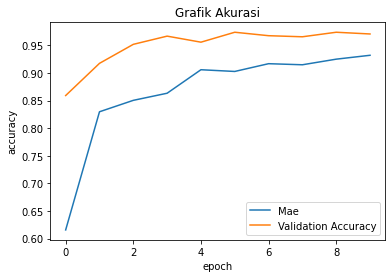

<Figure size 432x288 with 0 Axes>

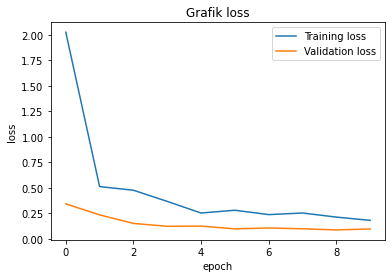

<Figure size 432x288 with 0 Axes>

In [47]:
# membuat grafik akurasi data training dan validasi
import matplotlib.pyplot as plt

accuracy = latih.history['accuracy']
val_accuracy = latih.history['val_accuracy']
loss = latih.history['loss']
val_loss = latih.history['val_loss']

epoch_range = range(len(accuracy))

plt.plot(epoch_range, accuracy, label='Mae')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.title('Grafik Akurasi')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Grafik loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

In [48]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpzafcwvrw/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [49]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)